# lstm example

In [3]:
# Using pandas to process data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators
from tensorflow.contrib.timeseries.python.timeseries import model as ts_model
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader

# a function defined to train lstm model
from lstm_time_series_demo.train_lstm import train_and_predict_timeseries_lstm

In [4]:
# toy data
# x and y are numpy ndarrays
x = np.array(range(1000))
noise = np.random.uniform(-0.2, 0.2, 1000)
y = np.sin(np.pi * x / 50 ) + np.cos(np.pi * x / 50) + np.sin(np.pi * x / 25) + noise

data = {
  tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
  tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}

print("The type of x is", type(x))

The type of x is <class 'numpy.ndarray'>


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_model_dir': './output_model', '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4f16da5978>, '_tf_random_seed': None, '_task_id': 0, '_task_type': 'worker', '_save_checkpoints_steps': None, '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_session_config': None}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./output_model/model.ckpt.
INFO:tensorflow:loss = 0.53335035, step = 1
INFO:tensorflow:global_step/sec: 7.70344
INFO:tensorflow:loss = 0.022759411, step = 101 (12.981 sec)
INFO:tensorflow:global_step/sec: 7.72771
INFO:tensorflow:loss = 0.03680922, step = 201 (12.9

INFO:tensorflow:Restoring parameters from ./output_model/model.ckpt-1000


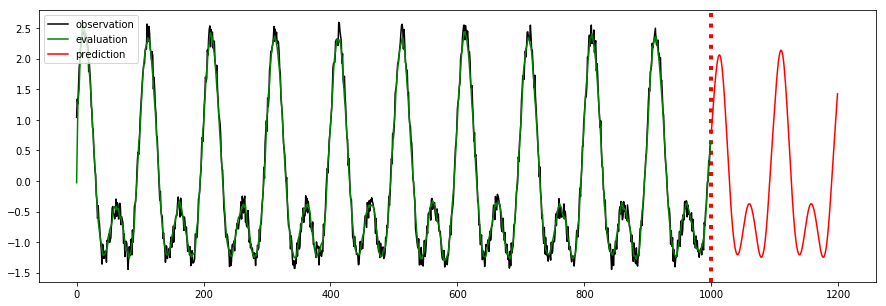

In [5]:
# train a lstm model to do eveluation
# one-feature prediction : num_features=1
train_and_predict_timeseries_lstm(data, window_size=100, num_features=1, num_units=128, train_steps=1000)

- A model that is trained for 10 steps
![10_steps](/home/cvdev/air-quality-prediction/lstm_time_series_demo/predict_result_10_steps.png)
- A model that is trained for 10 steps
![1000_steps](/home/cvdev/air-quality-prediction/lstm_time_series_demo/predict_result_1000_steps.png)

# 对空气质量的单特征进行预测

In [6]:
# Using pandas to process data
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

from data_util import parse_bj_aq_data, plot_station, plot_stations, generate_model_data

In [7]:
bj_aq_data, stations, bj_aq_stations, bj_aq_stations_merged = parse_bj_aq_data()

NaN in PM2.5 is 23459, 6.508615 %
NaN in PM10 is 96175, 26.683406 %
NaN in NO2 is 21720, 6.026135 %
NaN in CO is 46144, 12.802486 %
NaN in O3 is 23732, 6.584358 %
NaN in SO2 is 21664, 6.010598 %
There are 35 air quality stations in Beijing

The stations in Beijing are:
 {'yongledian_aq', 'yufa_aq', 'dingling_aq', 'fengtaihuayuan_aq', 'dongsi_aq', 'gucheng_aq', 'wanshouxigong_aq', 'yanqin_aq', 'yizhuang_aq', 'tongzhou_aq', 'pingchang_aq', 'beibuxinqu_aq', 'huairou_aq', 'xizhimenbei_aq', 'qianmen_aq', 'mentougou_aq', 'donggaocun_aq', 'miyun_aq', 'miyunshuiku_aq', 'guanyuan_aq', 'zhiwuyuan_aq', 'aotizhongxin_aq', 'pinggu_aq', 'shunyi_aq', 'daxing_aq', 'tiantan_aq', 'dongsihuan_aq', 'nongzhanguan_aq', 'fangshan_aq', 'liulihe_aq', 'wanliu_aq', 'nansanhuan_aq', 'yungang_aq', 'badaling_aq', 'yongdingmennei_aq'}


/home/cvdev/air-quality-prediction/data_util.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("utc_time", axis=1, inplace=True)
/home/cvdev/air-quality-prediction/data_util.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  bj_aq_station.drop("stationId", axis=1, inplace=True)


In [8]:
bj_aq_stations_merged

,yongledian_aq_PM2.5,yongledian_aq_PM10,yongledian_aq_NO2,yongledian_aq_CO,yongledian_aq_O3,yongledian_aq_SO2,yufa_aq_PM2.5,yufa_aq_PM10,yufa_aq_NO2,yufa_aq_CO,...,donggaocun_aq_NO2,donggaocun_aq_CO,donggaocun_aq_O3,donggaocun_aq_SO2,yongdingmennei_aq_PM2.5,yongdingmennei_aq_PM10,yongdingmennei_aq_NO2,yongdingmennei_aq_CO,yongdingmennei_aq_O3,yongdingmennei_aq_SO2
format_time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 14:00:00,329.0,NaN,130.0,5.5,6.0,12.0,285.0,322.0,87.0,5.2,...,123.0,5.5,2.0,6.0,415.0,NaN,143.0,6.7,12.0,12.0
2017-01-01 15:00:00,317.0,NaN,128.0,5.5,7.0,10.0,302.0,319.0,87.0,5.3,...,123.0,5.3,2.0,5.0,409.0,NaN,143.0,0.7,12.0,13.0
2017-01-01 16:00:00,326.0,NaN,133.0,0.6,7.0,11.0,302.0,350.0,94.0,5.7,...,126.0,4.6,2.0,5.0,401.0,NaN,134.0,7.1,12.0,11.0
2017-01-01 17:00:00,345.0,NaN,142.0,6.5,6.0,11.0,316.0,353.0,95.0,5.8,...,122.0,3.7,2.0,5.0,407.0,NaN,126.0,7.2,12.0,10.0
2017-01-01 18:00:00,356.0,NaN,146.0,6.7,5.0,8.0,336.0,360.0,97.0,5.9,...,101.0,2.8,2.0,5.0,415.0,NaN,142.0,7.3,13.0,12.0
2017-01-01 19:00:00,365.0,NaN,153.0,0.7,5.0,8.0,319.0,324.0,100.0,6.1,...,87.0,2.7,2.0,5.0,426.0,NaN,120.0,7.6,13.0,10.0
2017-01-01 20:00:00,362.0,NaN,153.0,6.7,3.0,9.0,312.0,324.0,95.0,5.8,...,89.0,2.7,2.0,5.0,384.0,NaN,109.0,7.1,12.0,11.0
2017-01-01 21:00:00,353.0,NaN,144.0,6.5,2.0,8.0,300.0,324.0,94.0,5.9,...,76.0,2.3,6.0,6.0,252.0,NaN,105.0,0.5,10.0,12.0
2017-01-01 22:00:00,340.0,NaN,142.0,6.6,2.0,6.0,278.0,324.0,93.0,0.6,...,53.0,1.8,14.0,6.0,97.0,NaN,92.0,2.2,9.0,12.0


首先随便取一个特征，使用 lstm 进行预测，验证一下效果

In [9]:
features = bj_aq_stations_merged["nansanhuan_aq_PM2.5"].values

In [13]:
features.shape

(10298,)

In [10]:
index = range(len(features))

In [18]:
data = {
  tf.contrib.timeseries.TrainEvalFeatures.TIMES: index,
  tf.contrib.timeseries.TrainEvalFeatures.VALUES: features,
}

In [21]:
train_and_predict_timeseries_lstm(data, window_size=2,num_features=1, num_units=128, train_steps=1000)

TypeError: train_and_predict_timeseries_lstm() got an unexpected keyword argument 'window_size'

In [ ]:
# train/dev/test set 的划分